In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



In [19]:
# Chargement des données
dataset = pd.read_csv('Breast Cancer Wisconsin.csv')

In [21]:
# Vérification des informations du dataset
dataset.info()
print(dataset.columns)
print(dataset.describe())
print(dataset.shape)
print(dataset.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# Suppression de la colonne inutile
if 'Unnamed: 32' in dataset.columns:
    dataset = dataset.drop('Unnamed: 32', axis=1)


In [25]:
# Conversion de "M" et "B" en 0 et 1
dataset["diagnosis"] = dataset["diagnosis"].map({"M": 1, "B": 0})

In [27]:
# Vérification des valeurs manquantes
print(dataset.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [29]:
# Définition des variables
X = dataset.iloc[:, 3:].values  # Exclure la colonne "diagnosis"
y = dataset["diagnosis"].values

In [31]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# Assurer que y est un vecteur
y = y.ravel()

In [35]:
# Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialisation et entraînement du modèle
model = SGDClassifier(max_iter=1000, loss='log_loss')
model.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [39]:
# Prédictions et score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.956140350877193


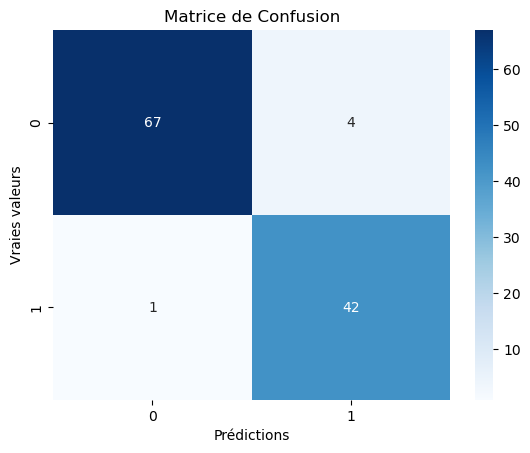

In [41]:
# 1. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()

In [43]:
# Sélection uniquement des 2 premières caractéristiques pour l'affichage
X_vis = X_train[:, [26, 19]]  # Sélectionne uniquement les colonnes 26 (concave points_worst)et 19(radius_worst) car Ces deux mesures sont souvent les plus significatives dans la classification des tumeurs dans le dataset Breast Cancer Wisconsin
X_test_vis = X_test[:, [26, 19]]

In [45]:
# Entraînement du modèle avec seulement ces 2 caractéristiques
model_vis = SGDClassifier(max_iter=1000, loss='log_loss')
model_vis.fit(X_vis, y_train)

SGDClassifier(loss='log_loss')

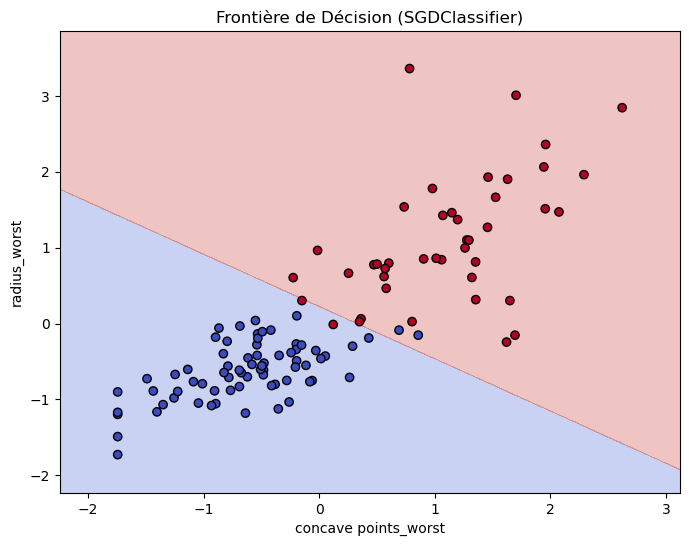

In [47]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='coolwarm'):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.xlabel('concave points_worst')
    plt.ylabel('radius_worst')
    plt.title('Frontière de Décision (SGDClassifier)')
    plt.show()

# -----------------------------
# Visualisation 2D sur 2 features
# -----------------------------
X_vis = X_train[:, [26, 19]]     # concave points_worst, radius_worst
X_test_vis = X_test[:, [26, 19]]

model_vis = SGDClassifier(max_iter=1000, loss='log_loss')
model_vis.fit(X_vis, y_train)

plot_decision_boundary(X_test_vis, y_test, model_vis)